In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%pip install pandasql
from pandasql import sqldf
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
#Elbow method
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler

In [33]:
TC  = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/Clean_data/Transaction_Clean.csv")
CDC = pd.read_csv("C:/Users/matages/Desktop/Customer Segmentation/Clean_data/Customer_Demographe_clean.csv")

In [34]:
TC = TC.iloc[:,1:]
CDC = CDC.iloc[:,1:]

In [35]:
print(TC.shape)
print(CDC.shape)

(19803, 14)
(3912, 14)


In [36]:
TC

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19799,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19800,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19801,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


In [37]:
RFM = TC[['transaction_date',"customer_id"]].groupby("customer_id").agg(['max'])
RFM = RFM['transaction_date']
RFM = RFM.reset_index()

In [38]:
RFM["max"] = pd.to_datetime(RFM["max"], format='%Y-%m-%d')
RFM

,customer_id,max
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14
...,...,...
3489,3497,2017-11-08
3490,3498,2017-08-25
3491,3499,2017-11-09
3492,3500,2017-08-08


In [39]:
d = []
for i in range(3494):
    d.append('2018-1-1')
RFM["today"] = pd.to_datetime(d)
RFM

,customer_id,max,today
0,1,2017-12-23,2018-01-01
1,2,2017-08-24,2018-01-01
2,3,2017-09-19,2018-01-01
3,4,2017-06-18,2018-01-01
4,5,2017-12-14,2018-01-01
...,...,...,...
3489,3497,2017-11-08,2018-01-01
3490,3498,2017-08-25,2018-01-01
3491,3499,2017-11-09,2018-01-01
3492,3500,2017-08-08,2018-01-01


In [40]:
RFM["Recency"] = (RFM['today'] - RFM['max']).dt.days
RFM.sort_values("Recency")

,customer_id,max,today,Recency
1502,1506,2017-12-30,2018-01-01,2
3010,3016,2017-12-30,2018-01-01,2
3275,3283,2017-12-30,2018-01-01,2
997,1000,2017-12-30,2018-01-01,2
1325,1328,2017-12-30,2018-01-01,2
...,...,...,...,...
821,822,2017-02-05,2018-01-01,330
1540,1544,2017-02-04,2018-01-01,331
1842,1846,2017-01-31,2018-01-01,335
2130,2135,2017-01-26,2018-01-01,340


In [41]:
Frequency  = TC['customer_id'].value_counts()
Frequency = Frequency.reset_index()
Frequency.sort_values('customer_id')

,customer_id,count
46,1,11
3040,2,3
465,3,8
3262,4,2
1211,5,6
...,...,...
2921,3497,3
1598,3498,6
1084,3499,7
1466,3500,6


In [42]:
RFM = RFM.merge(Frequency, on='customer_id', how='left')
RFM

,customer_id,max,today,Recency,count
0,1,2017-12-23,2018-01-01,9,11
1,2,2017-08-24,2018-01-01,130,3
2,3,2017-09-19,2018-01-01,104,8
3,4,2017-06-18,2018-01-01,197,2
4,5,2017-12-14,2018-01-01,18,6
...,...,...,...,...,...
3489,3497,2017-11-08,2018-01-01,54,3
3490,3498,2017-08-25,2018-01-01,129,6
3491,3499,2017-11-09,2018-01-01,53,7
3492,3500,2017-08-08,2018-01-01,146,6


In [12]:
Monetary = TC[['list_price',"customer_id"]].groupby("customer_id").agg(['sum'])
Monetary = Monetary['list_price']
Monetary = Monetary.reset_index()
Monetary

,customer_id,sum
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48
3492,3500,4922.41


In [13]:
RFM = RFM.merge(Monetary, on='customer_id', how='left')
RFM

,customer_id,max,today,Recency,count,sum
0,1,2017-12-23,2018-01-01,9,11,9084.45
1,2,2017-08-24,2018-01-01,130,3,4149.07
2,3,2017-09-19,2018-01-01,104,8,9888.23
3,4,2017-06-18,2018-01-01,197,2,1047.72
4,5,2017-12-14,2018-01-01,18,6,5903.20
...,...,...,...,...,...,...
3489,3497,2017-11-08,2018-01-01,54,3,3744.07
3490,3498,2017-08-25,2018-01-01,129,6,5177.06
3491,3499,2017-11-09,2018-01-01,53,7,7673.48
3492,3500,2017-08-08,2018-01-01,146,6,4922.41


In [14]:
RFM = RFM[['customer_id','Recency','count','sum']]
RFM.columns = ['customer_id','Recency','Frequency','Monetary']
RFM

,customer_id,Recency,Frequency,Monetary
0,1,9,11,9084.45
1,2,130,3,4149.07
2,3,104,8,9888.23
3,4,197,2,1047.72
4,5,18,6,5903.20
...,...,...,...,...
3489,3497,54,3,3744.07
3490,3498,129,6,5177.06
3491,3499,53,7,7673.48
3492,3500,146,6,4922.41


In [15]:
RFM_Cluster = RFM[['Recency','Frequency','Monetary']]

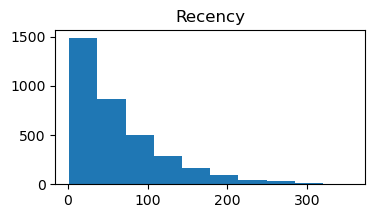

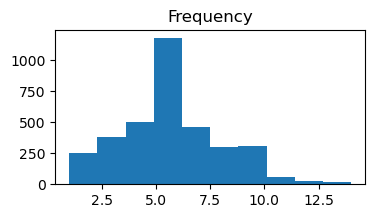

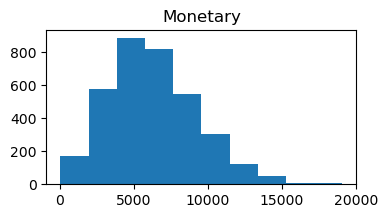

In [16]:
for i in RFM_Cluster.columns :
    plt.figure(figsize =(4,2))
    plt.hist(RFM_Cluster[i])
    plt.title(i)
    plt.show()

In [17]:
scaler = StandardScaler() 
RFM_Cluster = scaler.fit_transform(RFM_Cluster)
RFM_Cluster

array([[-0.93163833,  2.30755079,  0.95213386],
       [ 1.14120008, -1.1544566 , -0.72335914],
       [ 0.69579679,  1.00929802,  1.22500601],
       ...,
       [-0.17787891,  0.57654709,  0.47312913],
       [ 1.41529442,  0.14379617, -0.46082094],
       [ 0.38744066, -1.1544566 , -1.61591906]])

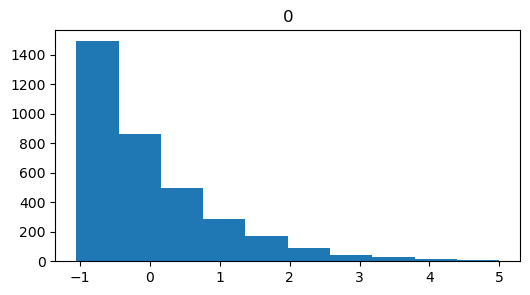

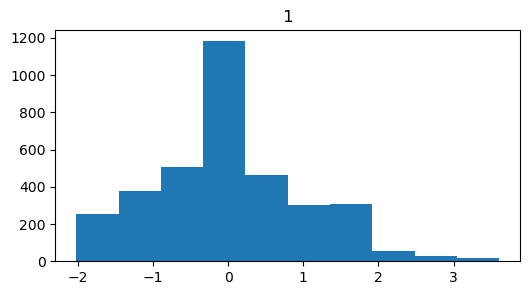

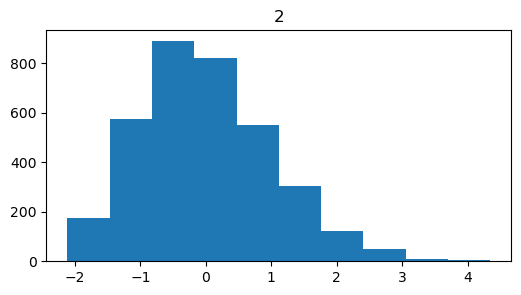

In [18]:
for i in range(3) :
    plt.figure(figsize =(6,3))
    plt.hist(RFM_Cluster[:,i])
    plt.title(i)
    plt.show()

In [19]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Cluster)
    kmeanModel.fit(RFM_Cluster)
    distortions.append(sum(np.min(cdist(RFM_Cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM_Cluster.shape[0])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

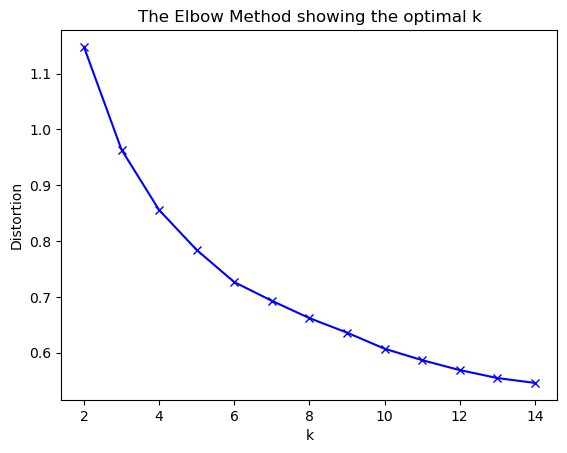

In [20]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#distortion = the values calculated with the cost function

In [21]:
model = KMeans(n_clusters=6)
model = model.fit(RFM_Cluster)

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
model.labels_

array([0, 4, 3, ..., 3, 4, 1])

In [23]:
RFM['Kmean'] = model.labels_

C:\Users\matages\AppData\Local\Temp\ipykernel_15416\2812814078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['Kmean'] = model.labels_


In [24]:
RFM[["Kmean","Recency","Frequency","Monetary"]].groupby('Kmean').aggregate(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Kmean,,,
0,33.284153,9.846995,11732.416475
1,56.906832,3.139752,3087.621646
2,202.605839,2.770073,2952.083869
3,38.742293,7.358816,8393.905771
4,119.815041,5.396341,6159.032988
5,29.491731,5.286659,5526.588953


In [25]:
dict_kmean = {   0:"4m-5-6.1k(Can’t Lose Them)",
                 1:"1m-7-8.3k(Loyal Customer)",
                 2:"1m-5-5.4k(Can’t Lose Them))",
                 3:"2m-3-3.0k(Need Attention)",
                 4:"6m-2-3.0k(Lost)",
                 5:"1m-9-11.7k(Loyal Customer)"
             }
dict_kmean

{0: '4m-5-6.1k(Can’t Lose Them)',
 1: '1m-7-8.3k(Loyal Customer)',
 2: '1m-5-5.4k(Can’t Lose Them))',
 3: '2m-3-3.0k(Need Attention)',
 4: '6m-2-3.0k(Lost)',
 5: '1m-9-11.7k(Loyal Customer)'}

In [26]:
RFM = RFM.replace({"Kmean": dict_kmean})
RFM

,customer_id,Recency,Frequency,Monetary,Kmean
0,1,9,11,9084.45,4m-5-6.1k(Can’t Lose Them)
1,2,130,3,4149.07,6m-2-3.0k(Lost)
2,3,104,8,9888.23,2m-3-3.0k(Need Attention)
3,4,197,2,1047.72,1m-5-5.4k(Can’t Lose Them))
4,5,18,6,5903.20,1m-9-11.7k(Loyal Customer)
...,...,...,...,...,...
3489,3497,54,3,3744.07,1m-7-8.3k(Loyal Customer)
3490,3498,129,6,5177.06,6m-2-3.0k(Lost)
3491,3499,53,7,7673.48,2m-3-3.0k(Need Attention)
3492,3500,146,6,4922.41,6m-2-3.0k(Lost)


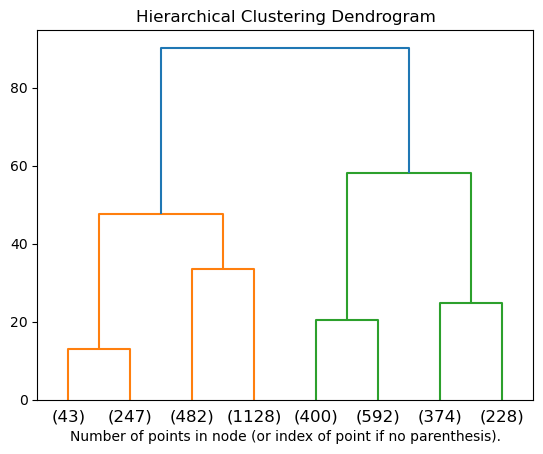

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(RFM_Cluster)

import matplotlib.pyplot as plt
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
model = AgglomerativeClustering(n_clusters=8)
model = model.fit(RFM_Cluster)

In [29]:
model.labels_

array([3, 2, 5, ..., 6, 0, 4], dtype=int64)

In [30]:
RFM['Hie'] = model.labels_
RFM[["Hie","Recency","Frequency","Monetary"]].groupby('Hie').aggregate(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Hie,,,
0,205.175439,4.008772,4497.250395
1,89.468880,5.547718,6368.056929
2,127.465241,3.088235,3094.556952
3,26.848276,10.203448,11890.355172
4,39.650338,3.364865,3412.746824
5,53.166362,7.928702,9137.166856
6,22.786575,6.480207,7255.465921
7,25.765000,5.017500,5018.839550


In [31]:
dict_kmean = {   0:"7m-4.0 -4.4k(lose)",
                 1:"3m-5.5 -6.3k(can't lose)",
                 2:"4m-3.0 -3.0k(Almost lose)",
                 3:"1m-10.2-11(champion)",
                 4:"1m-3.3 -3.4k(recently)",
                 5:"2m-7.9 -9.1k(loyalty)",
                 6:"1m-6.4 -7.2k(Becoming loyalty)",
                 7:"1m-5.0 -5.0k(Potential )"
             }
dict_kmean

{0: '7m-4.0 -4.4k(lose)',
 1: "3m-5.5 -6.3k(can't lose)",
 2: '4m-3.0 -3.0k(Almost lose)',
 3: '1m-10.2-11(champion)',
 4: '1m-3.3 -3.4k(recently)',
 5: '2m-7.9 -9.1k(loyalty)',
 6: '1m-6.4 -7.2k(Becoming loyalty)',
 7: '1m-5.0 -5.0k(Potential )'}

# try using mean in Monetary

In [44]:
Monetary = TC[['list_price',"customer_id"]].groupby("customer_id").agg(['mean'])
Monetary = Monetary['list_price']
Monetary = Monetary.reset_index()
Monetary

,customer_id,mean
0,1,825.859091
1,2,1383.023333
2,3,1236.028750
3,4,523.860000
4,5,983.866667
...,...,...
3489,3497,1248.023333
3490,3498,862.843333
3491,3499,1096.211429
3492,3500,820.401667


In [45]:
RFM2 = RFM.merge(Monetary, on='customer_id', how='left')
RFM2

,customer_id,max,today,Recency,count,mean
0,1,2017-12-23,2018-01-01,9,11,825.859091
1,2,2017-08-24,2018-01-01,130,3,1383.023333
2,3,2017-09-19,2018-01-01,104,8,1236.028750
3,4,2017-06-18,2018-01-01,197,2,523.860000
4,5,2017-12-14,2018-01-01,18,6,983.866667
...,...,...,...,...,...,...
3489,3497,2017-11-08,2018-01-01,54,3,1248.023333
3490,3498,2017-08-25,2018-01-01,129,6,862.843333
3491,3499,2017-11-09,2018-01-01,53,7,1096.211429
3492,3500,2017-08-08,2018-01-01,146,6,820.401667


In [47]:
RFM2 = RFM2[['customer_id','Recency','count','mean']]
RFM2.columns = ['customer_id','Recency','Frequency','Monetary']
RFM2

,customer_id,Recency,Frequency,Monetary
0,1,9,11,825.859091
1,2,130,3,1383.023333
2,3,104,8,1236.028750
3,4,197,2,523.860000
4,5,18,6,983.866667
...,...,...,...,...
3489,3497,54,3,1248.023333
3490,3498,129,6,862.843333
3491,3499,53,7,1096.211429
3492,3500,146,6,820.401667


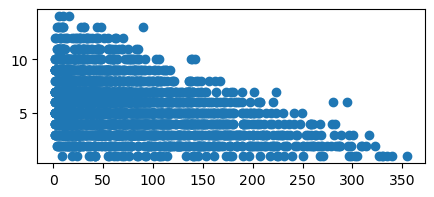

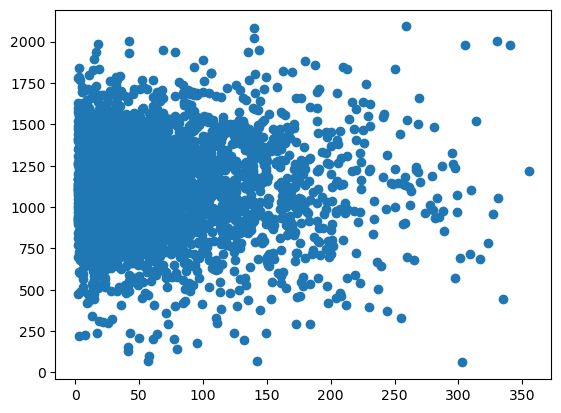

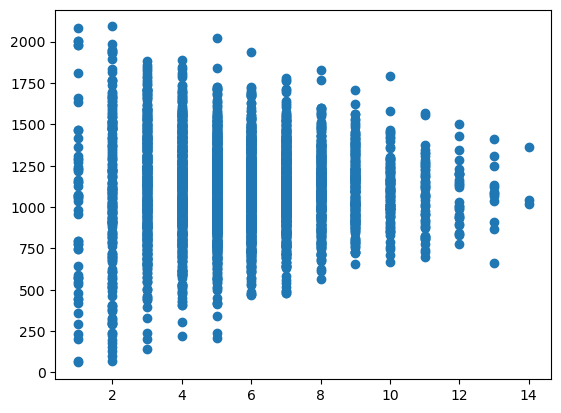

In [81]:
plt.figure(figsize =(5,2))
plt.scatter(RFM2['Recency'],RFM2['Frequency'])
plt.show()
plt.scatter(RFM2['Recency'],RFM2['Monetary'])
plt.show()
plt.scatter(RFM2['Frequency'],RFM2['Monetary'])
plt.show()

In [49]:
RFM_Cluster = RFM2[['Recency','Frequency','Monetary']]
scaler = StandardScaler() 
RFM_Cluster = scaler.fit_transform(RFM_Cluster)
RFM_Cluster

array([[-0.93163833,  2.30755079, -0.99171069],
       [ 1.14120008, -1.1544566 ,  0.97909304],
       [ 0.69579679,  1.00929802,  0.45914317],
       ...,
       [-0.17787891,  0.57654709, -0.03541925],
       [ 1.41529442,  0.14379617, -1.01101471],
       [ 0.38744066, -1.1544566 , -2.12085382]])

In [50]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Cluster)
    kmeanModel.fit(RFM_Cluster)
    distortions.append(sum(np.min(cdist(RFM_Cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM_Cluster.shape[0])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

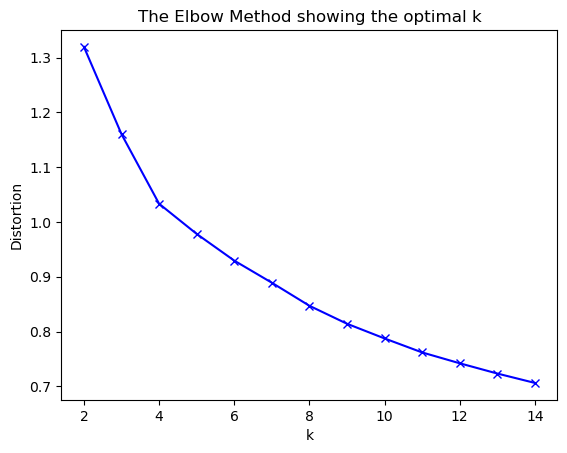

In [51]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#distortion = the values calculated with the cost function

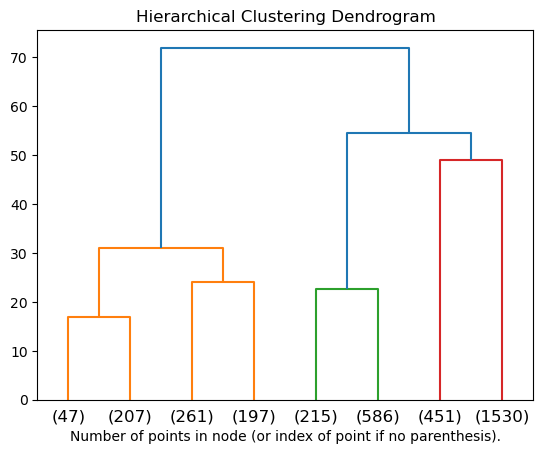

In [55]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(RFM_Cluster)

import matplotlib.pyplot as plt
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [57]:
model = AgglomerativeClustering(n_clusters=8)
model = model.fit(RFM_Cluster)
model.labels_
RFM2['Hie'] = model.labels_
RFM2[["Hie","Recency","Frequency","Monetary"]].groupby('Hie').aggregate(['mean'])

C:\Users\matages\AppData\Local\Temp\ipykernel_15416\3791308130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM2['Hie'] = model.labels_


,Recency,Frequency,Monetary
,mean,mean,mean
Hie,,,
0,38.876630,6.427282,1195.831248
1,33.450512,4.056314,859.682407
2,184.817259,3.010152,750.199922
3,49.403548,3.822616,1445.190425
4,43.690432,9.360225,1113.481138
5,162.181102,4.078740,1377.266531
6,119.172414,4.605364,1008.571350
7,41.046512,6.855814,758.200854


In [66]:
dict_hie2 = {  0:"Potential Loyalists",
                 1:"Promising",
                 2:"Hiberating",
                 3:"Long time big buy",
                 4:"loyalty",
                 5:"At risk",
                 6:"need attention",
                 7:"Small basket size"
             }

In [68]:
RFM2['Hie'] = RFM2['Hie'].map(dict_hie2)

In [59]:
model = KMeans(n_clusters=8)
model = model.fit(RFM_Cluster)
model.labels_

RFM2['Kmean'] = model.labels_

RFM2[["Kmean","Recency","Frequency","Monetary"]].groupby('Kmean').aggregate(['mean'])

C:\Users\matages\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary
,mean,mean,mean
Kmean,,,
0,34.001410,6.860367,1276.916101
1,57.367052,3.768786,1532.385886
2,220.414365,2.939227,1254.209151
3,36.556314,6.010239,826.894813
4,121.513453,5.356502,1145.912606
5,33.741794,9.599562,1060.237282
6,36.916515,3.892922,1067.860375
7,120.334862,3.027523,614.869666


In [63]:
dict_kmean2 = {  0:"Potential Loyalists",
                 1:"Long time big buy",
                 2:"At risk",
                 3:"Small basket size",
                 4:"need attention",
                 5:"loyalty",
                 6:"Promising",
                 7:"Hibernating"
             }
dict_kmean2

{0: 'Potential Loyalists',
 1: 'Long time big buy',
 2: 'At risk',
 3: 'Small basket size',
 4: 'need attention',
 5: 'loyalty',
 6: 'Promising',
 7: 'Hibernating'}

In [64]:
RFM2['Kmean'] = RFM2['Kmean'].map(dict_kmean2)

In [69]:
RFM2

,customer_id,Recency,Frequency,Monetary,Hie,Kmean
0,1,9,11,825.859091,loyalty,loyalty
1,2,130,3,1383.023333,At risk,need attention
2,3,104,8,1236.028750,loyalty,need attention
3,4,197,2,523.860000,Hiberating,Hibernating
4,5,18,6,983.866667,Potential Loyalists,Small basket size
...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,Long time big buy,Promising
3490,3498,129,6,862.843333,need attention,need attention
3491,3499,53,7,1096.211429,Potential Loyalists,Potential Loyalists
3492,3500,146,6,820.401667,need attention,need attention


In [76]:
pd.crosstab(RFM2['Hie'], RFM2['Kmean'])

Kmean,At risk,Hibernating,Long time big buy,Potential Loyalists,Promising,Small basket size,loyalty,need attention
Hie,,,,,,,,
At risk,96,0,24,0,0,0,0,134
Hiberating,59,136,0,0,0,0,0,2
Long time big buy,12,0,303,42,88,0,0,6
Potential Loyalists,0,0,17,615,139,148,13,65
Promising,0,73,0,0,283,230,0,0
Small basket size,0,0,0,0,0,195,20,0
loyalty,0,0,0,52,0,2,424,55
need attention,14,9,2,0,41,11,0,184


Kmean and hierachical have some same result

# try using quentile to segment

In [263]:
RFM_quentile = RFM2[["customer_id","Recency","Frequency","Monetary"]]

In [264]:
def score(x,y):
    if   y < x.quantile(0.2):
        return 1
    elif y < x.quantile(0.4):
        return 2
    elif y < x.quantile(0.6):
        return 3
    elif y < x.quantile(0.8):
        return 4
    else :
        return 5

In [265]:
for i in ["Recency","Frequency","Monetary"]:
    RFM_quentile[i+"_q"] = RFM_quentile[i].apply(lambda y: score(RFM_quentile[i],y))

C:\Users\matages\AppData\Local\Temp\ipykernel_15416\3531125524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_quentile[i+"_q"] = RFM_quentile[i].apply(lambda y: score(RFM_quentile[i],y))
C:\Users\matages\AppData\Local\Temp\ipykernel_15416\3531125524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_quentile[i+"_q"] = RFM_quentile[i].apply(lambda y: score(RFM_quentile[i],y))


In [266]:
RFM_quentile

,customer_id,Recency,Frequency,Monetary,Recency_q,Frequency_q,Monetary_q
0,1,9,11,825.859091,1,5,1
1,2,130,3,1383.023333,5,1,5
2,3,104,8,1236.028750,5,5,4
3,4,197,2,523.860000,5,1,1
4,5,18,6,983.866667,2,4,2
...,...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,3,1,4
3490,3498,129,6,862.843333,5,4,1
3491,3499,53,7,1096.211429,3,4,3
3492,3500,146,6,820.401667,5,4,1


In [269]:
Champion = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 5) & (RFM_quentile["Frequency_q"] ==5) & (RFM_quentile["Monetary_q"]==5)].tolist()

In [270]:
Loyal_Customer = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 3) & (RFM_quentile["Frequency_q"] ==5) & (RFM_quentile["Monetary_q"]==5)].tolist()

In [271]:
New_Customer = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 5) & (RFM_quentile["Frequency_q"] ==1)].tolist()

In [272]:
Need_Attention = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 3) & (RFM_quentile["Frequency_q"] ==3) & (RFM_quentile["Monetary_q"]==3)].tolist()

In [273]:
Cannot_Lose_Them = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 1) & (RFM_quentile["Frequency_q"] ==5) & (RFM_quentile["Monetary_q"]==5)].tolist()

In [280]:
Lost = RFM_quentile["customer_id"][(RFM_quentile["Recency_q"] == 1) & (RFM_quentile["Frequency_q"] ==1) & (RFM_quentile["Monetary_q"]==1)].tolist()

In [281]:
len(Champion)+len(Loyal_Customer)+len(New_Customer)+len(Need_Attention)+len(Cannot_Lose_Them)+len(Lost)

369

In [275]:
def Rule_base(x):
    if x in Champion:
        return "Champion"
    elif x in Loyal_Customer:
        return "Loyal_Customer"
    elif x in New_Customer:
        return "New_Customer"
    elif x in Need_Attention:
        return "Need_Attention"
    elif x in Cannot_Lose_Them:
        return "Cannot_Lose_Them"
    elif x in Lost:
        return "Lost"
    else:
        return "ERROR"

In [276]:
RFM_quentile

,customer_id,Recency,Frequency,Monetary,Recency_q,Frequency_q,Monetary_q
0,1,9,11,825.859091,1,5,1
1,2,130,3,1383.023333,5,1,5
2,3,104,8,1236.028750,5,5,4
3,4,197,2,523.860000,5,1,1
4,5,18,6,983.866667,2,4,2
...,...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,3,1,4
3490,3498,129,6,862.843333,5,4,1
3491,3499,53,7,1096.211429,3,4,3
3492,3500,146,6,820.401667,5,4,1


In [277]:
RFM2["Rule_base"] = RFM2["customer_id"].apply(lambda x:Rule_base(x))

In [278]:
RFM2[RFM2["Rule_base"] == "ERROR"]

,customer_id,Recency,Frequency,Monetary,Hie,Kmean,Rule_base
0,1,9,11,825.859091,loyalty,loyalty,ERROR
2,3,104,8,1236.028750,loyalty,need attention,ERROR
4,5,18,6,983.866667,Potential Loyalists,Small basket size,ERROR
5,6,66,5,1186.338000,Potential Loyalists,Promising,ERROR
7,8,24,10,1202.476000,loyalty,loyalty,ERROR
...,...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,Long time big buy,Promising,ERROR
3490,3498,129,6,862.843333,need attention,need attention,ERROR
3491,3499,53,7,1096.211429,Potential Loyalists,Potential Loyalists,ERROR
3492,3500,146,6,820.401667,need attention,need attention,ERROR


In [279]:
RFM2

,customer_id,Recency,Frequency,Monetary,Hie,Kmean,Rule_base
0,1,9,11,825.859091,loyalty,loyalty,ERROR
1,2,130,3,1383.023333,At risk,need attention,New_Customer
2,3,104,8,1236.028750,loyalty,need attention,ERROR
3,4,197,2,523.860000,Hiberating,Hibernating,New_Customer
4,5,18,6,983.866667,Potential Loyalists,Small basket size,ERROR
...,...,...,...,...,...,...,...
3489,3497,54,3,1248.023333,Long time big buy,Promising,ERROR
3490,3498,129,6,862.843333,need attention,need attention,ERROR
3491,3499,53,7,1096.211429,Potential Loyalists,Potential Loyalists,ERROR
3492,3500,146,6,820.401667,need attention,need attention,ERROR
